In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [ ]:
data = np.genfromtxt("../../datasets/video_game_sales.csv", dtype=str, delimiter=",", skip_header=1, invalid_raise=False, filling_values="", missing_values="") 
data

In [ ]:
names = data[:, 1]
platforms = data[:, 2]
years = np.array([int(x) if x != 'N/A' else np.nan for x in data[:, 3]]) 
genres=data[:, 4]
publishers=data[:, 5]
na_sales=np.array([float(x) if x != 'N/A' else np.nan for x in data[:, 6]]) 
eu_sales=np.array([float(x) if x != 'N/A' else np.nan for x in data[:, 7]]) 
jp_sales=np.array([float(x) if x != 'N/A' else np.nan for x in data[:, 8]]) 
other_sales=np.array([float(x) if x != 'N/A' else np.nan for x in data[:, 9]]) 
global_sales=np.array([float(x) if x != 'N/A' else np.nan for x in data[:, 10]]) 

### The Most Popular 10 Games


In [ ]:
top_10_idx = np.argsort(global_sales)[::-1][:10]
top_10 = [
    [str(name), str(platform), str(genre), int(year), float(g_sale)] 
    for name, platform, genre, year, g_sale in 
    zip(names[top_10_idx], platforms[top_10_idx], genres[top_10_idx], years[top_10_idx], global_sales[top_10_idx])
]

top_10.insert(0, ["Name", "Platform", "Genre", "Year", "Sale"])
top_10

### The Most Popular 10 Platforms

In [ ]:
unq_platforms, unq_counts = np.unique(platforms, return_counts=True)
top_10_idx = np.argsort(unq_counts)[::-1][:10]
counts = [[str(p), int(c)] for p, c in zip(unq_platforms[top_10_idx], unq_counts[top_10_idx])]

counts.insert(0, ["Platform", "Count"])
counts

### The Most Popular 10 Genres


In [ ]:
unq_genres, unq_counts = np.unique(genres, return_counts=True)
top_10_idx = np.argsort(unq_counts)[::-1][:10]
counts = [[str(g), int(c)] for g,c in zip(unq_genres[top_10_idx], unq_counts[top_10_idx])]
counts.insert(0, ["Genre", "Count"])
counts

### Avg Game Sales by Region

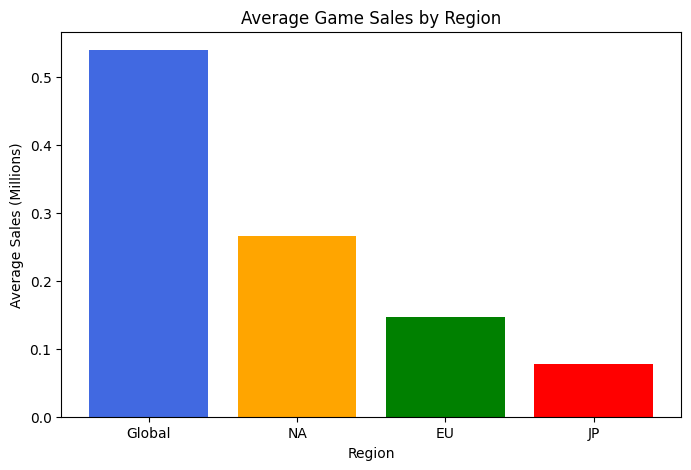

In [9]:
avg_global_sales = float(np.mean(global_sales))
avg_na_sales = float(np.mean(na_sales))
avg_eu_sales = float(np.mean(eu_sales))
avg_jp_sales = float(np.mean(jp_sales))

avgs = [avg_global_sales, avg_na_sales, avg_eu_sales,avg_jp_sales]
labels = ["Global", "NA", "EU", "JP"]
max_avg_idx = np.argmax(avgs)
sorted_avg_idx = np.argsort(np.array(avgs))[::-1]

avg_region = [[str(label), float(avg)] for label, avg in zip(np.array(labels)[sorted_avg_idx], np.array(avgs)[sorted_avg_idx])]
avg_region.insert(0,["Region", "AvgSales"])



fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(labels, avgs, color=["royalblue", "orange", "green", "red"])

ax.set_xlabel("Region")
ax.set_ylabel("Average Sales (Millions)")
ax.set_title("Average Game Sales by Region")
plt.show()

### Correlation Between Regions

In [ ]:
def find_correlation(X, Y):
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    centeredX = X - mean_X
    centeredY = Y - mean_Y

    normalizedX = centeredX / np.std(X)
    normalizedY = centeredY / np.std(Y)

    Z = normalizedX * normalizedY
    return np.mean(Z)


corr_regions =  np.array([
    find_correlation(na_sales, eu_sales),
    find_correlation(na_sales, jp_sales),
    find_correlation(na_sales, global_sales),
    find_correlation(eu_sales, jp_sales),
    find_correlation(eu_sales, global_sales),
    find_correlation(jp_sales, global_sales)
])
sort_idx = np.argsort(corr_regions)[::-1]

corr_labels = np.array(["NA-EU", "NA-JP","NA-Global", "EU-JP", "EU-Global", "JP-Global"])
corr_regions = [[str(label), float(cor)] for label, cor in zip(corr_labels[sort_idx], corr_regions[sort_idx])]
corr_regions.insert(0,   ["Pair", "Correlation"])

corr_regions
high_corr = corr_regions[1]
low_corr = corr_regions[-1]

def split_regions(pairs: str):
    regions = pairs.split("-")
    return f"{regions[0]} ve {regions[1]}"
corr_regions

### Regional Contribution Ratios

In [ ]:
mask = global_sales != 0

rates = np.array([[na/globe,eu/globe, jp/globe] for na, eu, jp, globe in zip(na_sales[mask], eu_sales[mask], jp_sales[mask], global_sales[mask])])
avgs =np.array([np.mean(rates[:, 0]),np.mean(rates[:, 1]),np.mean(rates[:,2])])
sort_idx = np.argsort(avgs)[::-1]
labels = np.array(["NA", "EU", "JP"])


contributions = [[str(label), float(rate * 100)] for label, rate in zip(labels[sort_idx], avgs[sort_idx])]
contributions

### Yearly Sales Trend

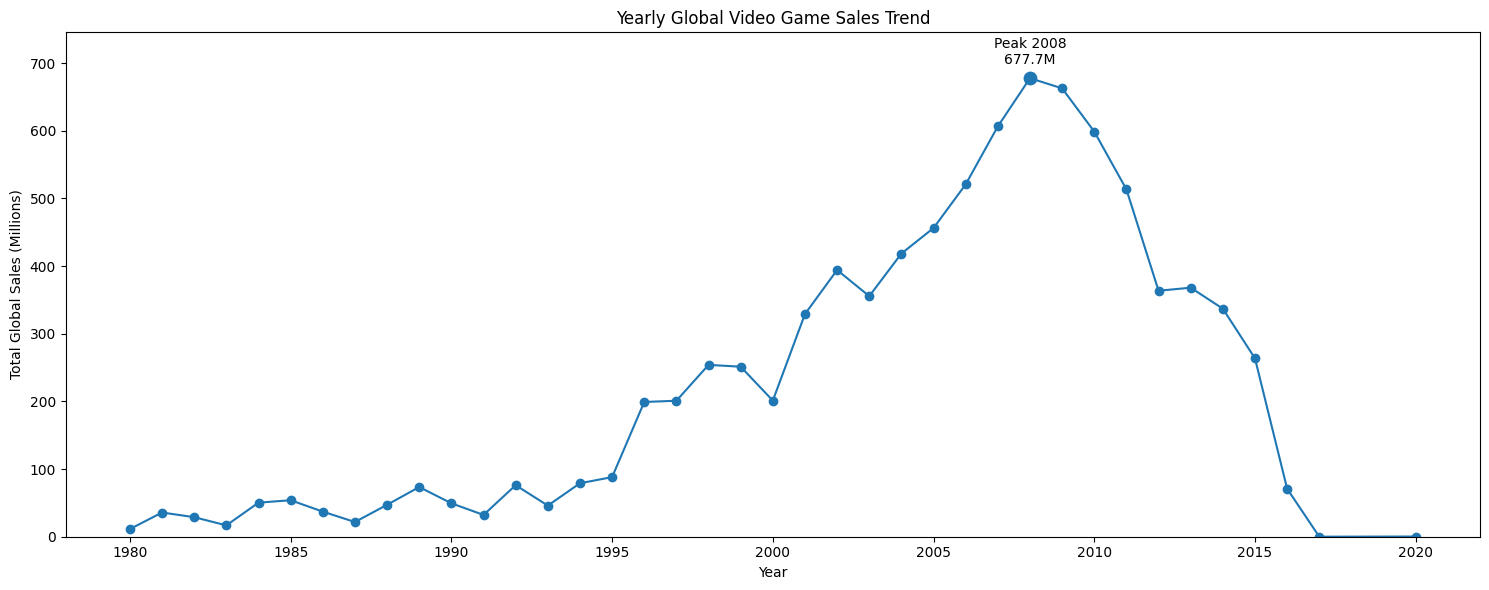

In [8]:
cleaned_years = years[~np.isnan(years)]

unq_years = np.sort(np.unique(cleaned_years))
sales = [[int(year), float(sum(global_sales[years == year])), float(sum(na_sales[years == year])),float(sum(eu_sales[years == year])),float(sum(jp_sales[years == year]))] for year in unq_years]
sales.insert(0, ["Year", "Global", "NA", "EU", "JP"])
global_sale_sums = np.array(sales)[1:, 1].astype(np.float64)
max_idx = np.argmax(global_sale_sums)
peak_year = int(np.array(sales)[1:,0][max_idx])
peak_value = float(np.array(sales)[1:,1][max_idx])


fig, ax = plt.subplots(1,figsize=(15, 6))
ax.plot(unq_years, global_sale_sums, marker="o")
ax.set_xlabel("Year")
ax.set_ylabel("Total Global Sales (Millions)")
ax.set_title("Yearly Global Video Game Sales Trend")
ax.set_ylim(0, global_sale_sums.max() * 1.1)

# Peak yılı vurgula
ax.scatter([peak_year], [peak_value], s=80)
ax.text(peak_year, peak_value + peak_value * 0.03,
        f"Peak {peak_year}\n{peak_value:.1f}M",
        ha="center")

plt.tight_layout()
plt.show()

### Avg Game Sales by Genre

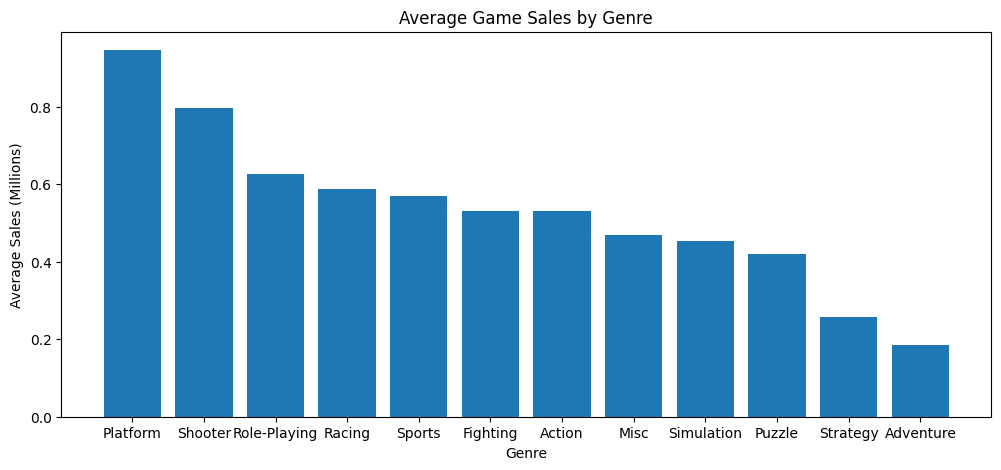

In [10]:
unq_genres = np.array(np.unique(genres))
genre_sale_avgs = np.array([np.mean(global_sales[genres == genre]) for genre in unq_genres])
sort_idx = np.argsort(genre_sale_avgs)[::-1]
genre_performance = [[str(genre), float(performance)] for genre, performance in zip(unq_genres[sort_idx], genre_sale_avgs[sort_idx])]
genre_performance.insert(0, ["Genre", "Avg Sale"])
genre_performance = np.array(genre_performance)

labels = genre_performance[1:,0]
avgs = genre_performance[1:,1].astype(np.float64)

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(labels, avgs)

ax.set_xlabel("Genre")
ax.set_ylabel("Average Sales (Millions)")
ax.set_title("Average Game Sales by Genre")
plt.show()

### Publisher Performance Matrix

In [ ]:
unq_publishers, total_game_count = np.unique(publishers, return_counts= True)
mask_global = global_sales > 1.0
hit_ratios = [
    [   str(pub), 
        int(np.sum(mask_global & (publishers == pub))),
        int(total),
        float(np.sum(mask_global & (publishers == pub)) / total) 
    ]
    for pub, total in zip(unq_publishers, total_game_count)
]

genres_publishers = []
for pub in unq_publishers:
    genres_each_pub, counts = np.unique(genres[publishers == pub], return_counts = True)
    max_id = np.argmax(counts)
    mask_publisher = publishers == pub
    mask_genre = genres == genres_each_pub[max_id]
    ratio = sum(global_sales[(mask_genre & mask_publisher)]) / sum(global_sales[mask_publisher])
    genres_publishers.append([str(pub), str(genres_each_pub[max_id]), int(counts[max_id]), float(ratio)])
genres_publishers
performance = [
    [
        *hit_row,               
        *genre_row[1:]          
    ]
    for hit_row in hit_ratios
    for genre_row in genres_publishers
    if hit_row[0] == genre_row[0]
]
pub, hit_count, total, hit_ratio, top_genre, genre_count, spec_ratio = max(performance, key=lambda row: row[6])
performance.insert(0, ["Publisher", "Hit Count", "Total", "Hit Ratio","Top Genre","Genre Count", "Spec Ratio"])
performance

### Platform Lifetime Sales Analysis

In [ ]:
unq_platforms = np.unique(platforms)
stats = []
for platform in unq_platforms:
    pl_mask = platforms == platform
    sale_sum = np.sum(global_sales[pl_mask])
    sale_avg = np.mean(global_sales[pl_mask])

    all_years = years[pl_mask]
    unq_years = np.unique(all_years)
    
    all_sales = [sum(global_sales[years == y]) for y in unq_years]
    max_id = np.argmax(all_sales)

    peak_year = unq_years[max_id]
    stats.append([str(platform), int(peak_year), int(sale_sum), float(sale_avg)])

platform, peak_year,sale_sum, sale_avg  = max(stats, key=lambda row: row[2])
stats.insert(0, ["Platform", "Peak Year", "Total Sales", "Avg Sales"])
stats